## Netlflix Case Study

#### Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

#### About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1]:
# importing the libraries necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
data = pd.read_csv("netflix.csv")

In [3]:
# Analysing the head
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

***Observation*** : There are 8807 entries (rows) and 12 categories (columns)

In [5]:
# Checking for null values if any
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Number of null values in each columns
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Percentage of null values in the corresponding columns
(((data.isna().sum())/len(data))*100).round(2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

***Observation***
- 29.9% of the data in ***director*** column are null
- 9.37% of the data in ***cast*** column are null
- 9.37% of the data in ***country*** column are null
- 0.11% of the data in ***date_added*** column are null
- 0.05% of the data in ***rating*** column are null
- 0.03% of the data in ***duration*** column are null

In [8]:
# Preliminary description of the data
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Data cleaning

#### 1. Column : Country

In [9]:
data['country'].isnull().sum()

831

- 9.37% (831 entries) of the data in ***country*** column are null

#### Issue : Null values
#### Approach : Replacing the null values with mode of the column

In [10]:
data["country"].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [11]:
data["country"].mode()[0]

'United States'

***United States*** is the mode of the data


In [12]:
data["country"]=data["country"].fillna(data["country"].mode()[0])

In [13]:
np.all(data["country"].isnull())

False

The column country is free of null values

#### 2. Column : date_added

#### Issue
- 1. Changing the Data type of the column 
- 2. Removing the Null values

In [14]:
data['date_added'] = pd.to_datetime(data['date_added']) #Changing the data

In [15]:
data["date_added"].dtypes

dtype('<M8[ns]')

In [16]:
data['date_added'].isnull().sum()

10

- 0.11% (10 entries) of the data in ***date_added*** column are null

#### Approach : Replacing the null values with mode of the column

In [17]:
data['date_added'].mode()[0]

Timestamp('2020-01-01 00:00:00')

In [18]:
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])

In [19]:
np.all(data["date_added"].isnull())

False

#### 3. Column : cast

In [20]:
data["cast"].isnull().sum()

825

- 9.37% (825 entries) of the data in ***cast*** column are null

Instead of populating the null values in the cast column with mode, we can replace the null values with **"Others"**

In [21]:
data['cast'].replace(np.nan,'Others',inplace =True)

In [22]:
data["cast"].isnull().sum()

0

#### 4. Column : rating

In [23]:
data["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

#### Quick description of movie rating in United States 
###### - TV shows
 - TV-MA : Mature audience only
 - TV-14 : Parents strongly cautioned
 - TV-PG : Parental guidance suggested
 - TV-Y7 : Directed to Older Children
 - TV-Y  : All Children
 - TV-G  : General Audience
 - TV-Y7-FV : Fantasy violence
 
###### - Movies
 - R     : Restricted – Under 17
 - PG-13 : Parents Strongly Cautioned
 - PG    : Parental Guidance Suggested
 - NR    : Not Rated
 - G     : General Audiences
 - NC-17 : Adutls only
 - UR    : Unrated


In [24]:
data["rating"].isnull().sum()

4

- 0.05% (4 entries) of the data in ***rating*** column are null

In [25]:
data["rating"].mode()[0]

'TV-MA'

In [26]:
data["rating"]=data["rating"].fillna(data["rating"].mode()[0])

In [27]:
data["rating"].isnull().sum()

0

#### 5. Column : duration

In [28]:
data["duration"].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

***Obeservation***
- Column duration has mixed values as it accounts for the duration of TV shows in "seasons" and Movies in "mins".
- To replace the null values, first the rows containing TV shows and movies have to identified individually

In [29]:
movies = data[data['type'] == 'Movie' ]
series = data[data['type'] == 'TV Show']

In [30]:
movies["duration"].isnull().sum()

3

In [31]:
series["duration"].isnull().sum()

0

***Observation***
- It is observed that only the Movies have null values and TV shows do not
- Hence it would be meaningful to replace the null values of column duration with the mode of movie duration

In [32]:
movies["duration"].mode()[0]

'90 min'

In [33]:
data["duration"]=data["duration"].fillna(movies["duration"].mode()[0])

In [34]:
np.all(data["duration"].isnull())

False

#### 6. Column : director

In [35]:
data["director"].isnull().sum()

2634

- 29.9% (2634 entries) of the data in ***director*** column are null

- Instead of replacing the null values with mode, we can replace the it with "Others"

In [36]:
data["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [37]:
data["director"].replace(np.nan,"Others",inplace=True)

In [38]:
data["director"].isnull().sum()

0

#### Now all the null values of the dataset have been managed

In [39]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [40]:
data_copy = data.copy()

In [41]:
data['month'] = data_copy['date_added'].dt.month_name()
data['added_year'] = data_copy['date_added'].dt.year

## Unnesting the data

#### Column : cast

In [42]:
data["cast"]

0                                                  Others
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  Others
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                               Others
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [43]:
cast= data["cast"].apply(lambda x: str(x).split(", ")).tolist()

In [44]:
cast[:5]

[['Others'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['Others'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar']]

In [45]:
data_cast=pd.DataFrame(cast,index=data["title"])

In [46]:
data_cast.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,Others,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,Others,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
My Little Pony: A New Generation,Vanessa Hudgens,Kimiko Glenn,James Marsden,Sofia Carson,Liza Koshy,Ken Jeong,Elizabeth Perkins,Jane Krakowski,Michael McKean,Phil LaMarr,...,None,None,None,None,None,None,None,None,None,None
Sankofa,Kofi Ghanaba,Oyafunmike Ogunlano,Alexandra Duah,Nick Medley,Mutabaruka,Afemo Omilami,Reggie Carter,Mzuri,None,None,...,None,None,None,None,None,None,None,None,None,None
The Great British Baking Show,Mel Giedroyc,Sue Perkins,Mary Berry,Paul Hollywood,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [47]:
data_cast_stacked = pd.DataFrame(data_cast.stack()).reset_index()
data_cast_stacked.head(5)

,title,level_1,0
0,Dick Johnson Is Dead,0,Others
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba


In [48]:
data_cast_stacked = data_cast_stacked.drop(columns = ['level_1'],axis = 1)
data_cast_stacked.rename(columns={0:'cast'}, inplace = True)
data_cast_stacked.head(5)

,title,cast
0,Dick Johnson Is Dead,Others
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


Unnested cast column is now added back to the original dataframe

In [49]:
data =data.merge(data_cast_stacked, on = 'title', how = 'inner')
data.head(5)

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,month,added_year,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Others
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Ama Qamata
2,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Khosi Ngema
3,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Gail Mabalane
4,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Thabang Molaba


In [50]:
data.drop(columns = ['cast_x'],axis = 1, inplace = True)

In [51]:
data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,month,added_year,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Others
1,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Ama Qamata
2,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Khosi Ngema
3,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Gail Mabalane
4,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Thabang Molaba


#### column 'description' also holds no significance for this analysis

In [52]:
data.drop(columns = ['description'],axis = 1, inplace = True)

In [53]:
data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month,added_year,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Others
1,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata
2,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Khosi Ngema
3,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Gail Mabalane
4,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Thabang Molaba


#### Column : country

In [54]:
country = data["country"].apply(lambda x:str(x).split(", ")).tolist()
country[:10]

[['United States'],
 ['South Africa'],
 ['South Africa'],
 ['South Africa'],
 ['South Africa'],
 ['South Africa'],
 ['South Africa'],
 ['South Africa'],
 ['South Africa'],
 ['South Africa']]

In [55]:
data_country=pd.DataFrame(country,index=data["title"])
data_country.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
title,,,,,,,,,,,,
Dick Johnson Is Dead,United States,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None


In [56]:
data_country_stacked = pd.DataFrame(data_country.stack()).reset_index()
data_country_stacked.head(5)

,title,level_1,0
0,Dick Johnson Is Dead,0,United States
1,Blood & Water,0,South Africa
2,Blood & Water,0,South Africa
3,Blood & Water,0,South Africa
4,Blood & Water,0,South Africa


In [57]:
data_country_stacked = data_country_stacked.drop(columns = ['level_1'],axis = 1)
data_country_stacked.rename(columns={0:'country'}, inplace = True)

In [58]:
data_country_stacked.head(5)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Blood & Water,South Africa
3,Blood & Water,South Africa
4,Blood & Water,South Africa


In [59]:
data =data.merge(data_country_stacked, on = 'title', how = 'inner')
data.head(5)

,show_id,type,title,director,country_x,date_added,release_year,rating,duration,listed_in,month,added_year,cast_y,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Others,United States
1,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa
3,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa
4,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa


In [60]:
data.head(2)

,show_id,type,title,director,country_x,date_added,release_year,rating,duration,listed_in,month,added_year,cast_y,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Others,United States
1,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa


In [61]:
data.drop(["country_x"],axis=1,inplace=True)


In [62]:
data.head(2)

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,month,added_year,cast_y,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Others,United States
1,s2,TV Show,Blood & Water,Others,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa


In [63]:
data.rename(columns={"cast_y":"cast","country_y":"country","listed_in":"Genre"},inplace=True)
data.head(5)

,show_id,type,title,director,date_added,release_year,rating,duration,Genre,month,added_year,cast,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Others,United States
1,s2,TV Show,Blood & Water,Others,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,Others,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa
3,s2,TV Show,Blood & Water,Others,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa
4,s2,TV Show,Blood & Water,Others,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa


#### Column : Genre

In [64]:
data = data.assign(genre=data['Genre'].str.split(', ')).explode('Genre')

In [65]:
data.head(2)

,show_id,type,title,director,date_added,release_year,rating,duration,Genre,month,added_year,cast,country,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Others,United States,[Documentaries]
1,s2,TV Show,Blood & Water,Others,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]"


In [66]:
data.shape

(852854, 14)

#### Column : Duration

In [67]:
data['runtime'] = data['duration'].apply (lambda x: str(x).split(' ')[1])
data['duration'] = data['duration'].apply(lambda x: str(x).split(' ')[0])

In [68]:
data['duration'] = data['duration'].astype(int)

#### Column : added

In [69]:
data['month'] = data['date_added'].dt.month_name()
data['added_year'] = data['date_added'].dt.year

In [70]:
data.head(2)

,show_id,type,title,director,date_added,release_year,rating,duration,Genre,month,added_year,cast,country,genre,runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,Documentaries,September,2021,Others,United States,[Documentaries],min
1,s2,TV Show,Blood & Water,Others,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Ama Qamata,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]",Seasons


## Data visualisation

## 1. Comparing the Distribution of Movies and TV shows

In [71]:
(((data_copy['type'].value_counts())/len(data_copy["type"]))*100).round(2)

Movie      69.62
TV Show    30.38
Name: type, dtype: float64

In [72]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% '.format(p=pct)
    return my_autopct

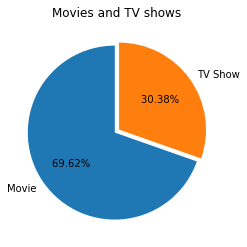

In [73]:
plt.pie(data_copy["type"].value_counts(),explode=(0.03,0.03),labels=["Movie","TV Show"],startangle = 90,autopct=make_autopct(data_copy["type"].value_counts()))
plt.title("Movies and TV shows")
plt.show()

***Observation***
- 69.62% are Movies and 30.38% are TV shows

 ### INSIGHTS : Movies are more popular than TV shows

## 2. Most popular type of rating

Top 5 rating

In [74]:
rating = data_copy["rating"].value_counts().reset_index()[:6]

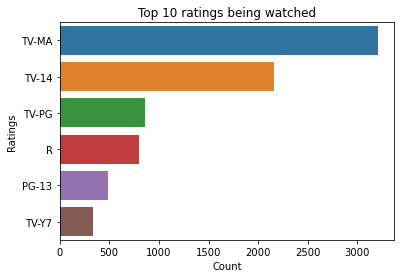

In [75]:
sns.barplot(y = rating['index'],x=rating['rating'],data = rating)
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.title('Top 10 ratings being watched')
plt.show()


 ### INSIGHTS : Mature audience TV shows (TV-MA) are more popular followed by shows for kids  of age 14 and above


## 3. Country

In [76]:
count_movies_per_country = movies.groupby(['country'])["type"].count().sort_values(ascending=False)
data_movies_per_country = pd.DataFrame(count_movies_per_country)

In [77]:
data_movies_per_country.rename(columns={'type':'count'},inplace = True)

In [78]:
data_movies_per_country = data_movies_per_country.reset_index()[:10]

In [79]:
data_movies_per_country

,country,count
0,United States,2498
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Turkey,76
9,Japan,76


In [80]:
count_series_per_country = series.groupby(['country'])["type"].count().sort_values(ascending=False)
data_series_per_country = pd.DataFrame(count_series_per_country)

In [81]:
data_series_per_country.rename(columns={'type':'count'},inplace = True)

In [82]:
data_series_per_country = data_series_per_country.reset_index()[:10]


In [83]:
data_series_per_country

,country,count
0,United States,1151
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Australia,48
9,Spain,48


In [84]:
merge_plot=data_movies_per_country.merge(data_series_per_country, on = 'country', how = 'outer')

In [85]:
merge_plot

,country,count_x,count_y
0,United States,2498.0,1151.0
1,India,893.0,79.0
2,United Kingdom,206.0,213.0
3,Canada,122.0,59.0
4,Spain,97.0,48.0
5,Egypt,92.0,NaN
6,Nigeria,86.0,NaN
7,Indonesia,77.0,NaN
8,Turkey,76.0,NaN
9,Japan,76.0,169.0


In [86]:
merge_plot['count_x'].replace(np.nan,0, inplace =True)
merge_plot['count_y'].replace(np.nan,0, inplace =True)

In [87]:
merge_plot.rename(columns = {'count_x':'movies_count','count_y':'series_count'},inplace=True)

In [88]:
merge_plot.index = np.arange(1, len(merge_plot)+1)

In [89]:
merge_plot =merge_plot.set_index('country')

In [90]:
merge_plot

,movies_count,series_count
country,,
United States,2498.0,1151.0
India,893.0,79.0
United Kingdom,206.0,213.0
Canada,122.0,59.0
Spain,97.0,48.0
Egypt,92.0,0.0
Nigeria,86.0,0.0
Indonesia,77.0,0.0
Turkey,76.0,0.0


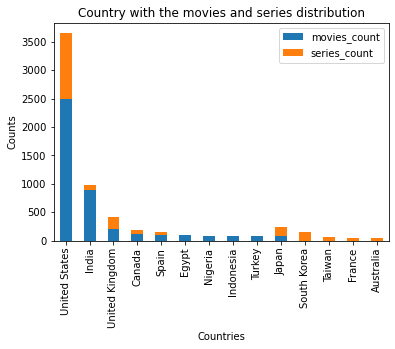

In [91]:
merge_plot.plot(kind='bar',stacked=True)
plt.title('Country with the movies and series distribution')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.show()


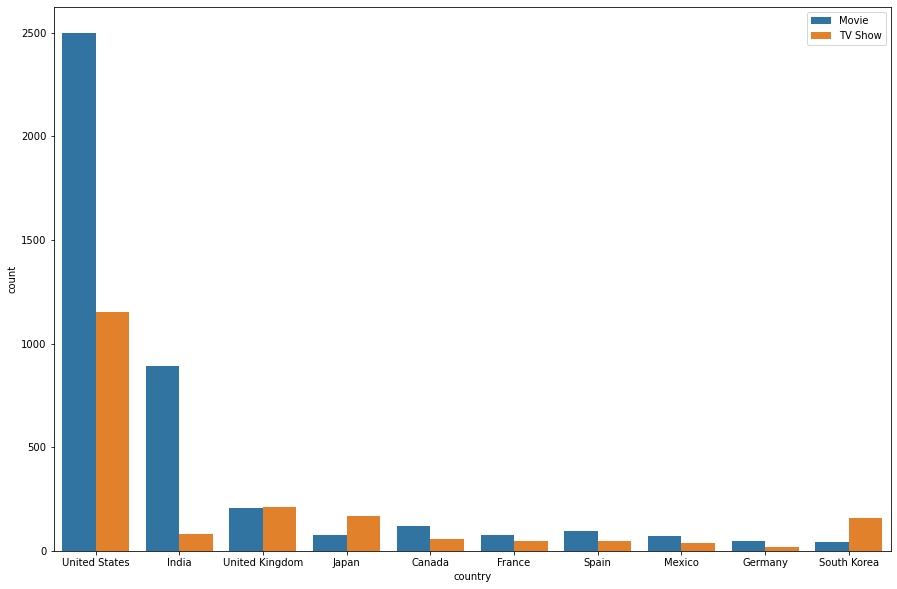

In [92]:
plt.figure(figsize=(15,10))
sns.countplot(data= data_copy, x= 'country' , hue= 'type',order = data["country"].value_counts().index[:10])
plt.legend(loc="upper right")
plt.show()

### INSIGHTS : It is observed that United states leads the world in both TV shows and Movies, India stands second in the list, followed by United kingdom and Japan.
### In India, it is observed that TV shows are least popular compared to movies
### In South Korea and Japan, TV shows are more popular compate to movies

# Growth of Netflix content over the years

In [93]:
data_copy['month'] = data_copy['date_added'].dt.month_name()
data_copy['added_year'] = data_copy['date_added'].dt.year

In [94]:
count_movies_per_year = data_copy.groupby(['added_year'])["type"].count().sort_values(ascending=False)
df_movies_per_year = pd.DataFrame(count_movies_per_year)


In [95]:
df_movies_per_year.rename(columns={'type':'count'},inplace = True)
df_movies_per_year = df_movies_per_year.reset_index()[:10]

In [96]:
df_movies_per_year

,added_year,count
0,2019,2016
1,2020,1889
2,2018,1649
3,2021,1498
4,2017,1188
5,2016,429
6,2015,82
7,2014,24
8,2011,13
9,2013,11


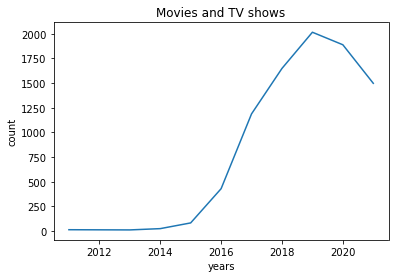

In [97]:
sns.lineplot(x = df_movies_per_year['added_year'],y = df_movies_per_year['count'],data=df_movies_per_year)
plt.xlabel('years')
plt.ylabel('count')
plt.title('Movies and TV shows')
plt.show()


## INSIGHTS
### There is a increase in the number of content produced from 2014 to 2018, this might be due to the internet being easily made available for everyone, thus with better internet and cheaper plans, users started using OTT more liberally

### But after 2019, popularity takes a slump, this might be due to the COVID pandemic, since the entire world was on lockdown, it would have been difficult for the movie/TV show production to happen, Hence hastily created content are less popular

## RECOMMENDATIONS : 
- Movies vs TV shows : It is observed that Movies are more popular content among viewers than TV shows
- 69.62% are Movies and 30.38% are TV shows
- Hence it is recommended that netflix should concentrate more on making movies


- TV shows for mature audience (TV-MA) are more popular with over 3211 entries than content rated otherwise
- It is followed by TV-14 (2160 entries) for kids of 14 years and above
- Hence it is recommended that netflix should produce content for Adults and Kids 

- Movies and TV shows from United states from United States are the most popular
- Almost 2498 movies and 1151 TV shows are from United states
- It is followed by India with over 893 movies and 79 TV shows
- Netlflix should be working with content creators from United States

- Content from 2014 to 2018 are more popular, compared to the preceeding or the succeeding years
- COVID pandemic has significantly affected the Content creation post 2019